In [1]:
import numpy as np
import pandas as pd

In [2]:
import urllib.request 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url = "https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt"
urllib.request.urlretrieve(url, 'iris.txt')

('iris.txt', <http.client.HTTPMessage at 0x7f8392781d30>)

In [5]:
df = pd.read_csv("iris.txt", sep="\t", index_col=0)
print(df.shape) # 何行何列か確認する
df.head() # 先頭五行の内容を確認する

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [6]:
X = np.array(df.iloc[:, :4].values) 
Y = np.array(df.iloc[:, 4])

In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=10000)

In [9]:
clf.fit(X, Y)

MLPClassifier(max_iter=10000)

In [10]:
clf.score(X, Y)

0.98

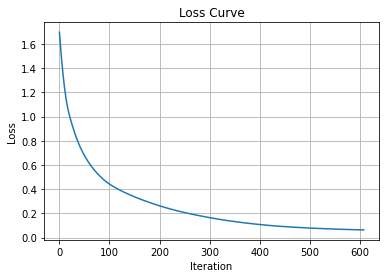

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Loss Curve")
plt.plot(clf.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [12]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
len(clf.predict(X))

150

In [14]:
pd.DataFrame(clf.predict_proba(X)).head()

,0,1,2
0,0.998918,0.001082,5.036136e-15
1,0.996178,0.003822,1.740422e-13
2,0.998151,0.001849,5.362010e-14
3,0.995710,0.004290,6.327527e-13
4,0.999122,0.000878,4.169845e-15


In [15]:
clf.get_params

<bound method BaseEstimator.get_params of MLPClassifier(max_iter=10000)>

In [17]:
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(10,), activation='logistic', solver='sgd', learning_rate_init=0.01)
clf.fit(X, Y)
clf.score(X, Y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.98

In [18]:
# 計算に2〜３分かかります。
results = []
for hidden_layer_sizes in [10, 100, 1000]:
    for solver in ['sgd', 'adam', 'lbfgs']:
        for activation in ['identity', 'logistic', 'tanh', 'relu']:
            for learning_rate_init in [0.1, 0.01, 0.001]:
                clf = MLPClassifier(max_iter=10000,
                       hidden_layer_sizes=(hidden_layer_sizes,), 
                       activation=activation, solver=solver,
                       learning_rate_init=learning_rate_init)
                clf.fit(X, Y)
                score = clf.score(X, Y)
                results.append([hidden_layer_sizes, activation,
                       solver, learning_rate_init, score])

In [19]:
pd.DataFrame([dat for dat in sorted(results, key=lambda f: f[4],
            reverse=True)], columns=["hidden_layer_sizes", 
            "activation", "solver", "learning_rate_init", "score"])

,hidden_layer_sizes,activation,solver,learning_rate_init,score
0,10,logistic,lbfgs,0.100,1.000000
1,10,logistic,lbfgs,0.001,1.000000
2,10,tanh,lbfgs,0.100,1.000000
3,10,tanh,lbfgs,0.010,1.000000
4,100,logistic,lbfgs,0.100,1.000000
...,...,...,...,...,...
103,10,tanh,sgd,0.100,0.666667
104,100,tanh,sgd,0.100,0.666667
105,100,identity,sgd,0.100,0.660000
106,1000,identity,sgd,0.100,0.620000
